![Alt text](imgs/image-1.png)

In [1]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import numpy as np

cols = ['ID', 'weight', 'batch']
df = pd.read_csv('datasets/euroweight.dat.txt', sep='\t', header=None, names=cols)

df.head()

,ID,weight,batch
0,1,7.512,1
1,2,7.502,1
2,3,7.461,1
3,4,7.562,1
4,5,7.528,1


In [2]:
df.batch.value_counts()

batch
1    250
2    250
3    250
4    250
5    250
6    250
7    250
8    250
Name: count, dtype: int64

In [3]:
df1 = df.loc[(df['batch'] == 1)]
df2 = df.loc[(df['batch'] == 2)]
df3 = df.loc[(df['batch'] == 3)]
df4 = df.loc[(df['batch'] == 4)]
df5 = df.loc[(df['batch'] == 5)]
df6 = df.loc[(df['batch'] == 6)]
df7 = df.loc[(df['batch'] == 7)]
df8 = df.loc[(df['batch'] == 8)]
#dfs = [df1, df2, df3, df4, df5, df6, df7, df8]

### Проверка гипотезы о нормальом распределении веса монет

##### Графики

In [4]:
dfs = [df['weight'], df1['weight'], df2['weight'], df3['weight'], df4['weight'], df5['weight'], df6['weight'], df7['weight'], df8['weight']]
titles = ['All', 'Batch = 1', 'Batch = 2', 'Batch = 3', 'Batch = 4', 'Batch = 5', 'Batch = 6', 'Batch = 7', 'Batch = 8']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

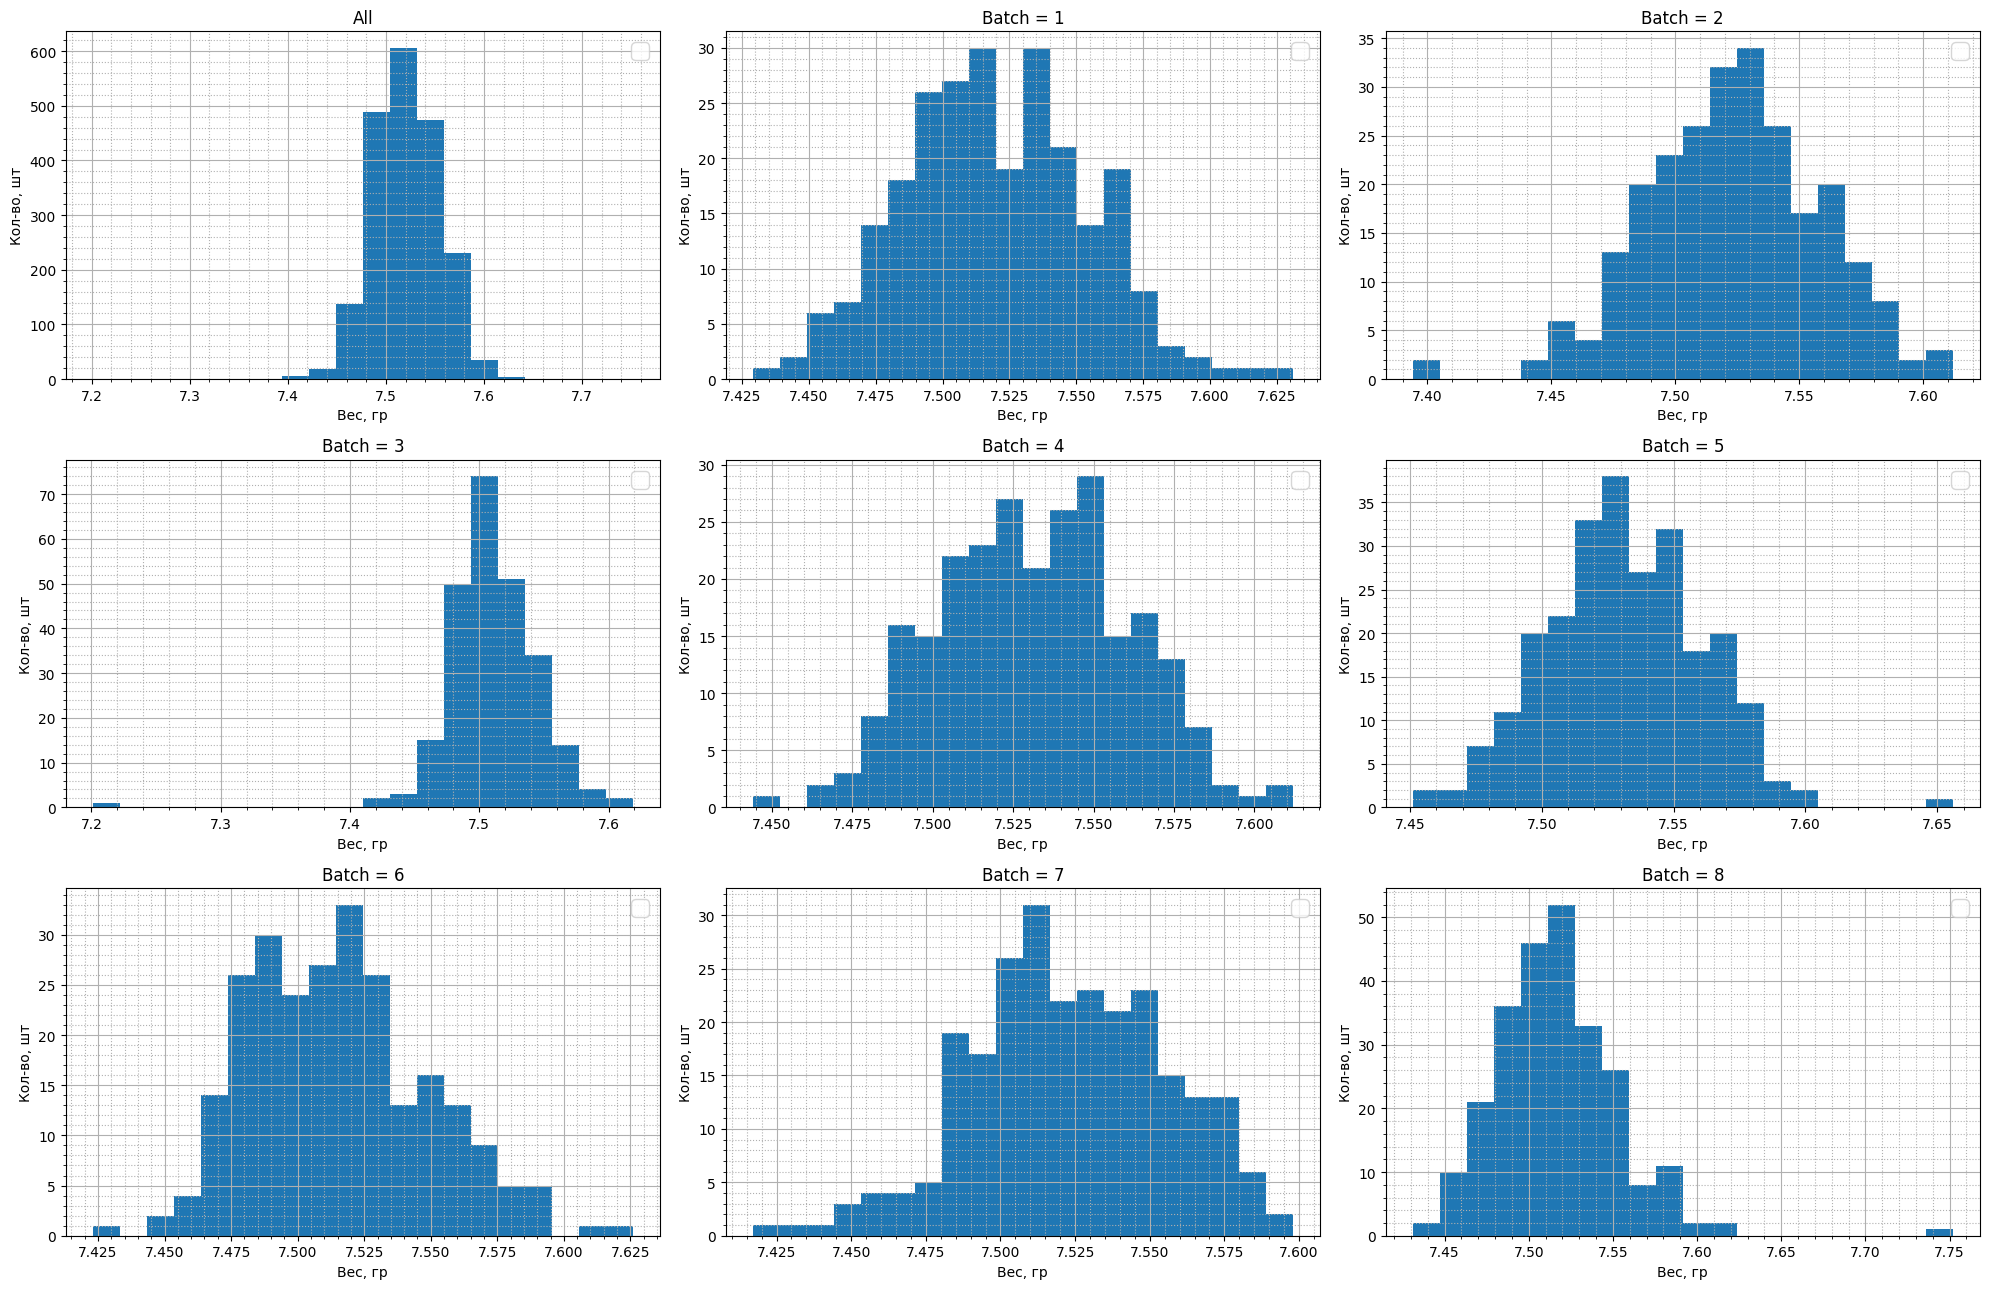

In [5]:
def pl(c, ax):
    ax.hist(x=dfs[c], bins=20);
    ax.set_xlabel(r'Вес, гр', fontsize=10)
    ax.set_ylabel(r'Кол-во, шт', fontsize=10)
    ax.set_title(titles[c])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 13))
c = 0

for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        pl(c, ax)
        c+=1
        
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')

fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

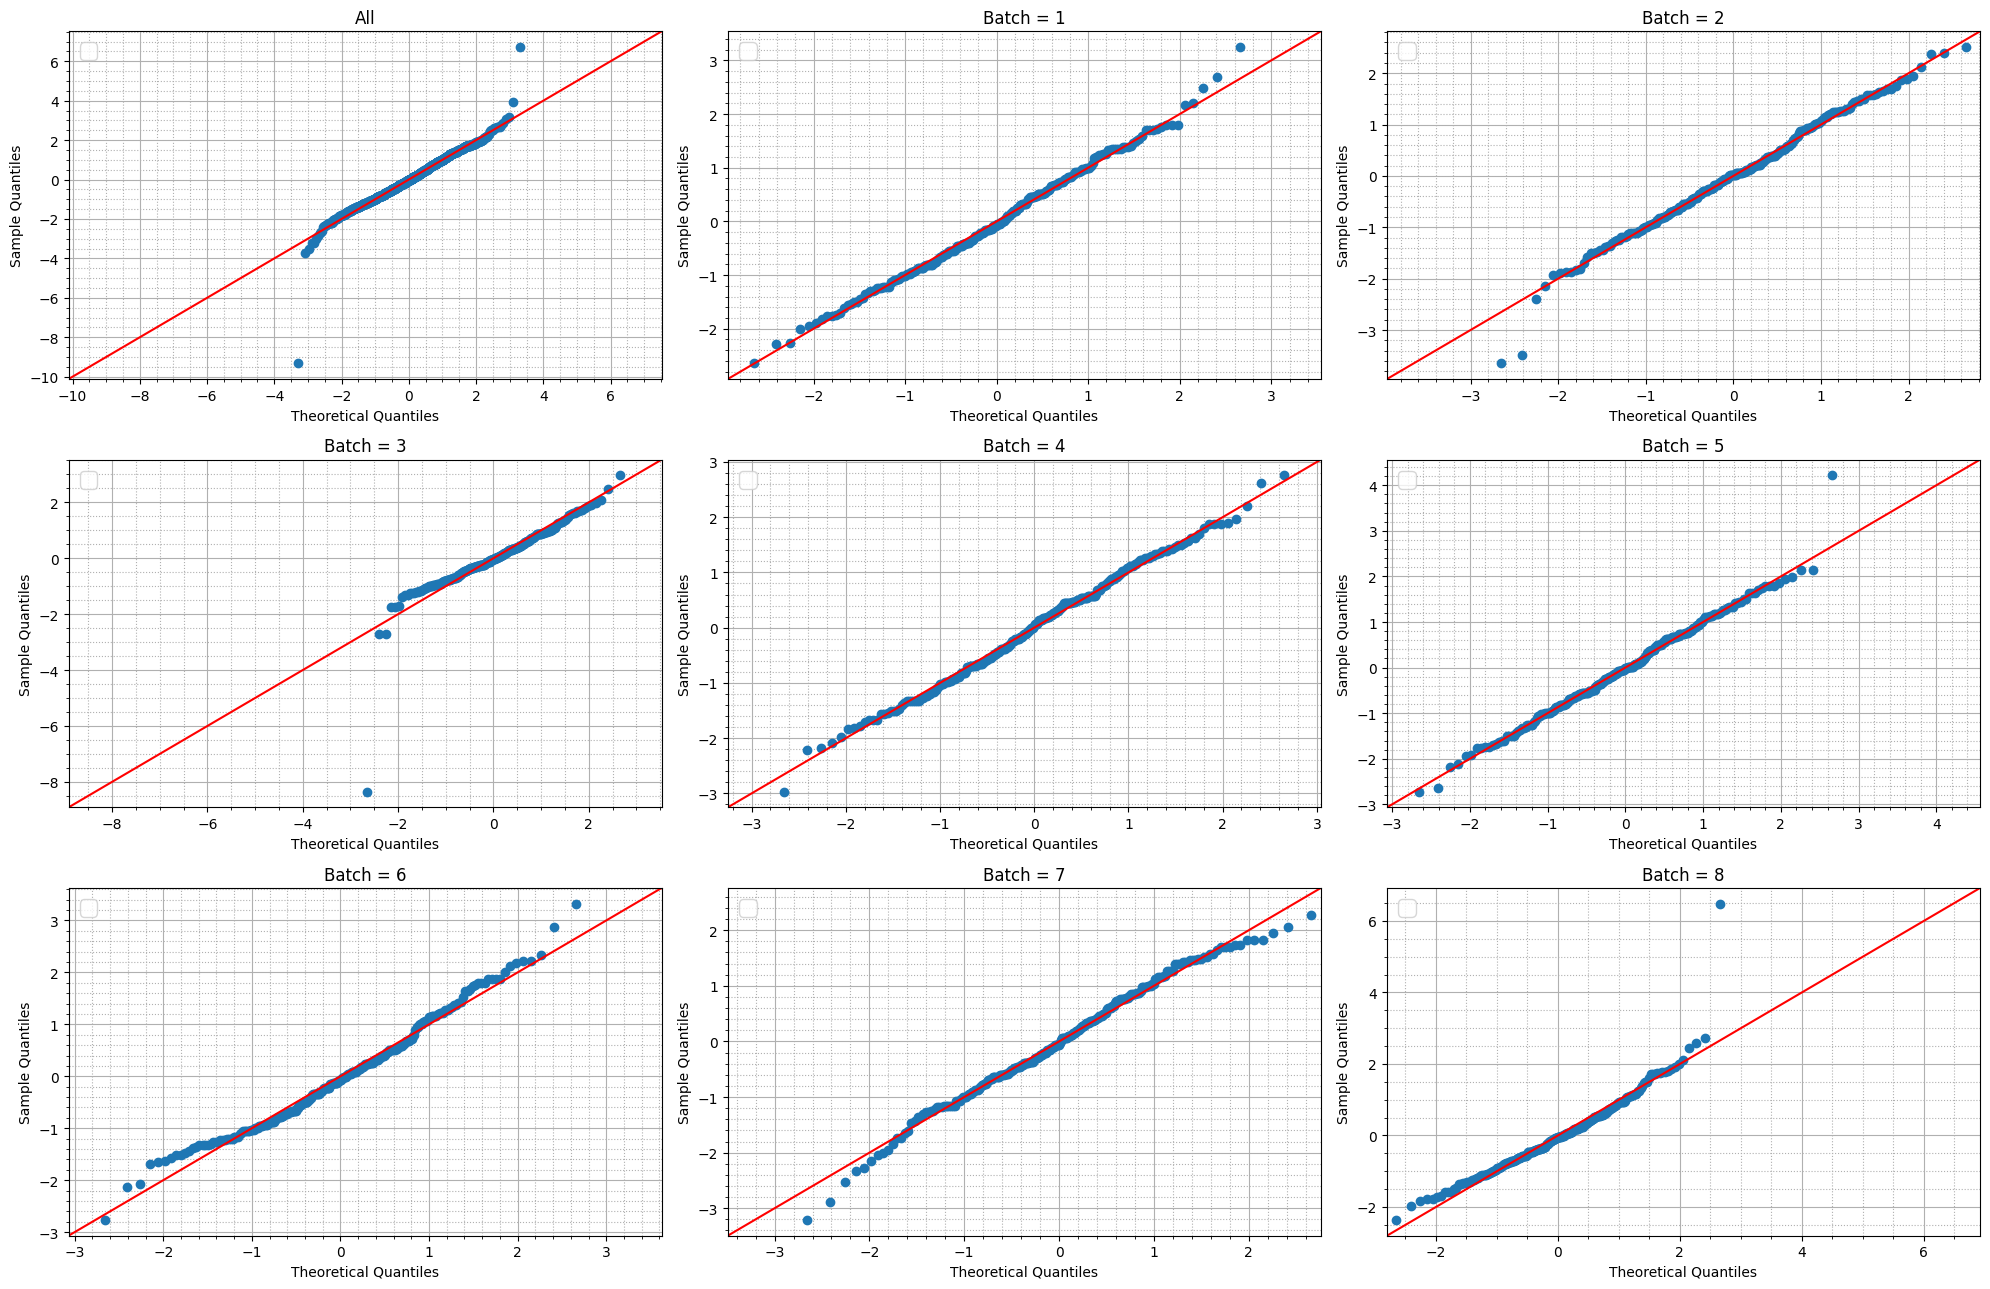

In [6]:
def pl2(c, ax):
    sm.qqplot(st.zscore(dfs[c]), line='45', ax=ax)
    ax.set_title(titles[c])

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 13))
c = 0

for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        pl2(c, ax)
        c+=1
        
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')

fig.tight_layout()
plt.show()

#####  Критерий Колмогорова

In [7]:
for i in range(9):
    print(titles[i], sm.stats.diagnostic.lilliefors(dfs[i], dist='norm', pvalmethod='table'))

All (0.023353803446905852, 0.011571953824175385)
Batch = 1 (0.038472438278823295, 0.5561350923909387)
Batch = 2 (0.03265930919143112, 0.7965275056985898)
Batch = 3 (0.07792267647627489, 0.0018867299978258315)
Batch = 4 (0.04544943866051099, 0.29591108053467025)
Batch = 5 (0.03499095797591667, 0.7066302097728936)
Batch = 6 (0.055099573639602606, 0.08645172680854328)
Batch = 7 (0.042332335662710996, 0.4079437539549428)
Batch = 8 (0.0701373917985999, 0.007800653023551762)


#### Критерий Андерсона-Дарлина
![Alt text](imgs/image-4.png)

(A, p)

принимаем гипотезу p > 0.05

In [8]:
for i in range(9):
    print(titles[i], sm.stats.diagnostic.normal_ad(dfs[i]))

All (1.6212909387968466, 0.0003645678937172996)
Batch = 1 (0.358993835809315, 0.44841795645241056)
Batch = 2 (0.3198658352252437, 0.5310507626925436)
Batch = 3 (2.563140644661388, 1.7415129658875051e-06)
Batch = 4 (0.39359475224202356, 0.37280847986901544)
Batch = 5 (0.25450066195386967, 0.7272366751566741)
Batch = 6 (1.1996300588162967, 0.003891929008134696)
Batch = 7 (0.44207581852151634, 0.2862126116024419)
Batch = 8 (1.404350782137584, 0.0012172348109999239)


#### Критерий Крамера-фон-Мизеса
![Alt text](imgs/image-5.png)

принимаем гипотезу p > 0.05

In [9]:
for i in range(9):
    print(titles[i], st.kstest(dfs[i], st.norm.cdf))

All KstestResult(statistic=0.9999999999997011, pvalue=0.0, statistic_location=7.201, statistic_sign=-1)
Batch = 1 KstestResult(statistic=0.9999999999999453, pvalue=0.0, statistic_location=7.429, statistic_sign=-1)
Batch = 2 KstestResult(statistic=0.9999999999999287, pvalue=0.0, statistic_location=7.394, statistic_sign=-1)
Batch = 3 KstestResult(statistic=0.9999999999997011, pvalue=0.0, statistic_location=7.201, statistic_sign=-1)
Batch = 4 KstestResult(statistic=0.9999999999999512, pvalue=0.0, statistic_location=7.444, statistic_sign=-1)
Batch = 5 KstestResult(statistic=0.9999999999999537, pvalue=0.0, statistic_location=7.451, statistic_sign=-1)
Batch = 6 KstestResult(statistic=0.9999999999999427, pvalue=0.0, statistic_location=7.423, statistic_sign=-1)
Batch = 7 KstestResult(statistic=0.99999999999994, pvalue=0.0, statistic_location=7.417, statistic_sign=-1)
Batch = 8 KstestResult(statistic=0.9999999999999462, pvalue=0.0, statistic_location=7.431, statistic_sign=-1)


#### Критерий Шапиро-Уилка
![Alt text](imgs/image-7.png)

принимаем гипотезу p > 0.05

In [10]:
for i in range(9):
    print(titles[i], st.shapiro(dfs[i]))

All ShapiroResult(statistic=0.9754774570465088, pvalue=5.04393437634063e-18)
Batch = 1 ShapiroResult(statistic=0.995506227016449, pvalue=0.68293696641922)
Batch = 2 ShapiroResult(statistic=0.9908998608589172, pvalue=0.12186499685049057)
Batch = 3 ShapiroResult(statistic=0.8634316325187683, pvalue=4.0891918215262e-14)
Batch = 4 ShapiroResult(statistic=0.9955042004585266, pvalue=0.6825649738311768)
Batch = 5 ShapiroResult(statistic=0.9910341501235962, pvalue=0.12900124490261078)
Batch = 6 ShapiroResult(statistic=0.9840592741966248, pvalue=0.006755967158824205)
Batch = 7 ShapiroResult(statistic=0.9907013773918152, pvalue=0.11200965940952301)
Batch = 8 ShapiroResult(statistic=0.9367195963859558, pvalue=6.826919030089584e-09)


#### Критерий Харке–Бера
![Alt text](imgs/image-8.png)

In [11]:
for i in range(9):
    print(titles[i], st.jarque_bera(dfs[i]))

All SignificanceResult(statistic=1645.2460197863131, pvalue=0.0)
Batch = 1 SignificanceResult(statistic=1.2951754199711618, pvalue=0.5233066227270129)
Batch = 2 SignificanceResult(statistic=3.6878464274992684, pvalue=0.15819557202798376)
Batch = 3 SignificanceResult(statistic=3676.2158891847166, pvalue=0.0)
Batch = 4 SignificanceResult(statistic=1.3378119391725412, pvalue=0.5122687088779635)
Batch = 5 SignificanceResult(statistic=4.08793469125378, pvalue=0.12951386400400022)
Batch = 6 SignificanceResult(statistic=7.041522852711392, pvalue=0.029576905956097743)
Batch = 7 SignificanceResult(statistic=1.9878064207291768, pvalue=0.37012917584627425)
Batch = 8 SignificanceResult(statistic=462.2070581832702, pvalue=4.2954885639661496e-101)


### Доверительные интервалы для парметров нормального распределения

Существует вероятность 95%, что доверительный интервал содержит истинный средний вес монет.

In [12]:
for i in range(9):
    print(titles[i], st.norm.interval(0.95, loc=np.mean(dfs[i]), scale=st.sem(dfs[i])))

All (7.519725795354421, 7.522739204645579)
Batch = 1 (7.515396604634839, 7.523915395365162)
Batch = 2 (7.518769245751872, 7.52756675424813)
Batch = 3 (7.504952453718362, 7.514135546281638)
Batch = 4 (7.527457559815282, 7.534750440184718)
Batch = 5 (7.5277236868715, 7.535068313128502)
Batch = 6 (7.511096795510206, 7.519383204489793)
Batch = 7 (7.51892554184486, 7.527106458155139)
Batch = 8 (7.512227042049532, 7.521244957950468)
